# Are YOU a Crossfit Games Athlete? This new data will let you know if YOU ARE (a) FIT.

https://medium.com/p/e83c04eb783e/edit

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
data_path = "/Users/pblsnt/Documents/DataScientist_Nanodegree_Udacity/Data"
crossfit_data = "/crossfit_games_data"

In [102]:
def read_file_csv(filepath, header=0, sep=','):
    return pd.read_csv(filepath_or_buffer=filepath, sep=sep, header=header)

In [103]:
crossfit_open_scores_2019_file = data_path + crossfit_data + "/2019_opens_scores.csv"
crossfit_open_athletes_2019_file = data_path + crossfit_data + "/2019_opens_athletes.csv"
crossfit_open_scores_2020_file = data_path + crossfit_data + "/2020_opens_scores.csv"
crossfit_open_athletes_2020_file = data_path + crossfit_data + "/2020_opens_athletes.csv"

## What does a Crossfit Athlete look like?

In [104]:
crossfit_open_athletes_2019 = read_file_csv(crossfit_open_athletes_2019_file)
crossfit_open_athletes_2019.head()

/opt/anaconda3/envs/DSNanodegree/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforigincode,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
0,2536,Samantha Briggs,Samantha,Briggs,accepted,F,0e63d-P2536_14-184.jpg,GB,United Kingdom,19,4098,CrossFit Black Five,37,1.70,61.23,1,33,0,Women (35-39)
1,485089,Renata Pimentel,Renata,Pimentel,accepted,F,04e97-P485089_5-184.jpg,BR,Brazil,19,15868,CrossFit Gurkha,36,1.74,73.00,2,66,0,Women (35-39)
2,16973,Carleen Mathews,Carleen,Mathews,NaN,F,b663a-P16973_6-184.jpg,US,United States,19,10471,CrossFit Saint Helens,35,1.57,62.14,3,101,0,Women (35-39)
3,751083,Danila Capaccetti,Danila,Capaccetti,NaN,F,pukie.png,IT,Italy,19,9329,CrossFit Black Shark,35,1.70,71.00,4,139,0,Women (35-39)
4,313257,Hope Cicero,Hope,Cicero,NaN,F,f204b-P313257_1-184.jpg,US,United States,19,438,CrossFit Billings,36,1.55,61.23,5,176,0,Women (35-39)


#### Select Meaningful Columns

In [106]:
columns_to_drop = ['competitorname'
                   , 'firstname'
                   , 'lastname'
                   , 'postcompstatus'
                   , 'profilepics3key'
                   , 'countryoforigincode'
                   , 'affiliatename'
                   , 'divisionid'
]

In [107]:
crossfit_open_athletes_2019_filtered = crossfit_open_athletes_2019.drop(columns_to_drop, axis=1)

### Athletes Characteristics

In [108]:
crossfit_open_athletes_2019_filtered.head()

,competitorid,gender,countryoforiginname,affiliateid,age,height,weight,overallrank,overallscore,is_scaled,division
0,2536,F,United Kingdom,4098,37,1.70,61.23,1,33,0,Women (35-39)
1,485089,F,Brazil,15868,36,1.74,73.00,2,66,0,Women (35-39)
2,16973,F,United States,10471,35,1.57,62.14,3,101,0,Women (35-39)
3,751083,F,Italy,9329,35,1.70,71.00,4,139,0,Women (35-39)
4,313257,F,United States,438,36,1.55,61.23,5,176,0,Women (35-39)


In [115]:
crossfit_open_athletes_2019_filtered.isna().mean()

competitorid           0.000000
gender                 0.000000
countryoforiginname    0.000000
affiliateid            0.000000
age                    0.000000
height                 0.480642
weight                 0.434642
overallrank            0.000000
overallscore           0.000000
is_scaled              0.000000
division               0.000000
dtype: float64

In [116]:
crossfit_open_athletes_2019_filtered[crossfit_open_athletes_2019_filtered.height.isna()].weight.isna().mean()

0.8573395678696124

In [117]:
crossfit_open_athletes_2019_filtered.height.describe()

count    297412.000000
mean          1.738713
std           0.096774
min           1.500000
25%           1.680000
50%           1.750000
75%           1.800000
max           1.960000
Name: height, dtype: float64

In [118]:
height_lower_cap = crossfit_open_athletes_2019_filtered.height.quantile(0.02) # 1.5 m
height_upper_cap = crossfit_open_athletes_2019_filtered.height.quantile(0.99) # 1.96 m

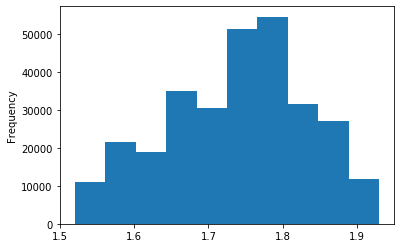

In [124]:
crossfit_open_athletes_2019_filtered.height.plot.hist(bins = 10,range=(height_lower_cap, height_upper_cap));

In [120]:
crossfit_open_athletes_2019_filtered \
    .loc[~crossfit_open_athletes_2019_filtered.height.between(height_lower_cap,height_upper_cap),"height"]= np.NaN

In [125]:
crossfit_open_athletes_2019_filtered.weight.describe()

count    323754.000000
mean         78.343412
std          44.720039
min       -9054.150000
25%          67.000000
50%          78.930000
75%          88.450000
max       16960.000000
Name: weight, dtype: float64

In [129]:
weight_lower_cap = crossfit_open_athletes_2019_filtered.weight.quantile(0.01) # 51 kg
weight_upper_cap = crossfit_open_athletes_2019_filtered.weight.quantile(0.99) # 120.2 kg

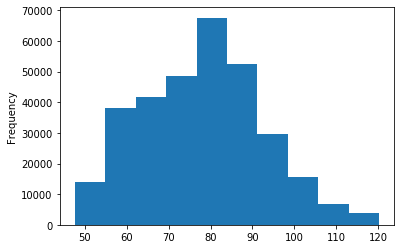

In [134]:
crossfit_open_athletes_2019_filtered.weight.plot.hist(bins = 10,range=(weight_lower_cap, weight_upper_cap));

In [121]:
crossfit_open_athletes_2019_filtered.isna().mean()

competitorid           0.000000
gender                 0.000000
countryoforiginname    0.000000
affiliateid            0.000000
age                    0.000000
height                 0.486724
weight                 0.434642
overallrank            0.000000
overallscore           0.000000
is_scaled              0.000000
division               0.000000
dtype: float64

In [31]:
from sklearn.impute import KNNImputer

ImportError: cannot import name 'KNNImputer' from 'sklearn.impute' (/opt/anaconda3/lib/python3.7/site-packages/sklearn/impute/__init__.py)

In [30]:
import sklearn.preprocessing.imputation. as KNNImputer
imputer = KNNImputer(missing_values=np.nan,n_neighbors=10,weights='distance',add_indicator=True)
crossfit_open_athletes_2019_imputed=imputer.fit_transform(crossfit_open_athletes_2019_filtered)

ModuleNotFoundError: No module named 'sklearn.impute.KNNImputer'

In [24]:
total_number_of_athletes_2019 = crossfit_open_athletes_2019_filtered.competitorid.count()

In [25]:
total_number_of_athletes_2019

572653

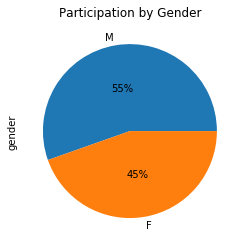

In [13]:
%matplotlib inline
crossfit_open_athletes_2019_filtered.gender.value_counts().plot(kind='pie'
                                                                , figsize=(4,4)
                                                                , autopct='%1.0f%%'
                                                                , pctdistance=0.5
                                                                , title='Participation by Gender');

In [14]:
%matplotlib inline
participation_by_country = crossfit_open_athletes_2019_filtered.countryoforiginname.value_counts()

In [15]:
top_participation_countries = participation_by_country.sort_values(ascending=False).head(10)
min_participation_countries = participation_by_country.sort_values(ascending=False).tail(10)

In [16]:
top_countries_df = crossfit_open_athletes_2019_filtered[["competitorid","countryoforiginname"]]

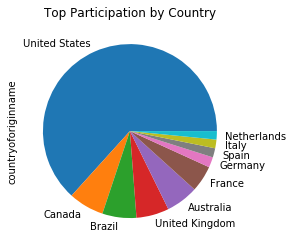

In [69]:
top_participation_countries.plot(kind="pie"
                                 , figsize=(4,4)
                                 , title='Top Participation by Country');

Text(0, 0.5, 'Flights')

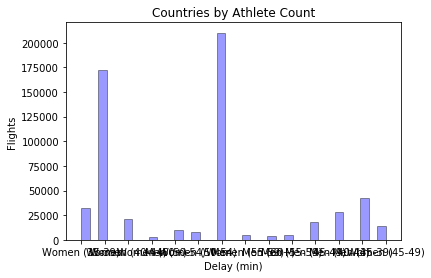

In [11]:
# seaborn histogram
sns.distplot(crossfit_open_athletes_2019_filtered['division'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Countries by Athlete Count')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [7]:
crossfit_open_scores_2019 = read_file_csv(crossfit_open_scores_2019_file)
crossfit_open_scores_2019.head()

,affiliate,breakdown,competitorid,division,is_scaled,judge,ordinal,rank,scaled,score,scoredisplay,scoreidentifier,time
0,CrossFit RDU,9 rounds +\n10 wall-ball shots\n,96511,Men (45-49),0,Erin Miller,1,1,0,13520000,352 reps,27f30f9a8c0a564ae799,NaN
1,CrossFit RDU,Within 16 minutes:\n3 rounds +\n25 toes-to-bar...,96511,Men (45-49),0,Harper Thorsen,2,4,0,13420368,342 reps,0ed3d1264f25a8f1890d,NaN
2,CrossFit RDU,200-ft. OH lunge\n50 box step-ups\n50 strict H...,96511,Men (45-49),0,Harper Thorsen,3,1,0,11800018,9:42,f2a143399a330c95321b,582.0
3,CrossFit RDU,132 reps\n6 rounds,96511,Men (45-49),0,Harper Thorsen,4,36,0,11320009,11:51,89101e401c6c85997363,711.0
4,CrossFit RDU,210 reps,96511,Men (45-49),0,Harper Thorsen,5,1,0,12100573,10:27,f7588c9174f1fe90f5c4,627.0


In [13]:
def join_df(left_df, right_df, on, how='inner', left_suffix='_left', right_suffix='_right'):
    return left_df.join(other=right_df, on=on, how=how, lsuffix=left_suffix, rsuffix=right_suffix)

In [14]:
crossfit_data_2019 = join_df(crossfit_open_athletes_2019, crossfit_open_scores_2019, on="competitorid")

In [15]:
crossfit_open_athletes_2019[(crossfit_open_athletes_2019["overallrank"]==1) 
                            & (crossfit_open_athletes_2019["is_scaled"]==0)
                            & (crossfit_open_athletes_2019["gender"]=="M")
                           ]

,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforigincode,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
229258,8747,Bill Grundler,Bill,Grundler,NaN,M,71e65-P8747_2-184.jpg,US,United States,5,809,CrossFit Inferno,50,1.83,88.45,1,66,0,Men (50-54)
246706,153604,Mathew Fraser,Mathew,Fraser,accepted,M,9e218-P153604_4-184.jpg,US,United States,1,3220,CrossFit Mayhem,29,1.70,88.45,1,66,0,Men
461416,536200,Carl Giuffre,Carl,Giuffre,NaN,M,21b2f-P536200_2-184.jpg,US,United States,9,3149,CrossFit Adrenaline,60,1.70,74.39,1,28,0,Men (60+)
465248,520317,Pierre Cleroux,Pierre,Cleroux,NaN,M,37025-P520317_1-184.jpg,CA,Canada,7,16011,CrossFit 1855,55,1.78,84.82,1,86,0,Men (55-59)
470495,96511,Stephen Johnson,Stephen,Johnson,NaN,M,51ed5-P96511_6-184.jpg,US,United States,3,6251,CrossFit RDU,49,1.83,96.16,1,43,0,Men (45-49)
488389,252855,Robbie Perovich,Robbie,Perovich,NaN,M,d03cb-P252855_3-184.jpg,CA,Canada,12,22415,Fort to Fort CrossFit,42,1.86,90.72,1,36,0,Men (40-44)
516773,120333,Jason Smith,Jason,Smith,accepted,M,f2583-P120333_4-184.jpg,ZA,South Africa,18,5578,CrossFit Kyalami,35,1.85,88.45,1,39,0,Men (35-39)
